<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import pearsonr


<ipython-input-3-87a10fc1fa21>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

In [7]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [8]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### Add your code below following the instructions given in the course to complete the peer graded assignment


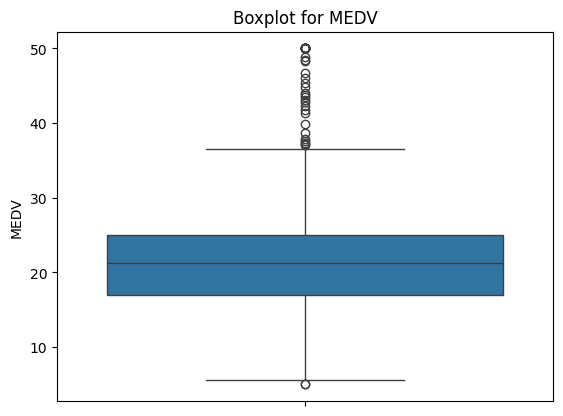

In [9]:
#For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(y='MEDV', data=boston_df)
pyplot.title("Boxplot for MEDV")
pyplot.show()


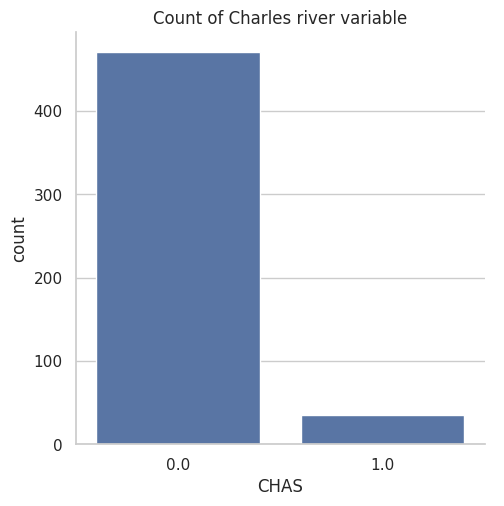

In [10]:
sns.set(style="whitegrid")
ax = sns.catplot(x = "CHAS", kind ="count", data = boston_df)
ax.set(xlabel='CHAS', ylabel='count', title = "Count of Charles river variable")

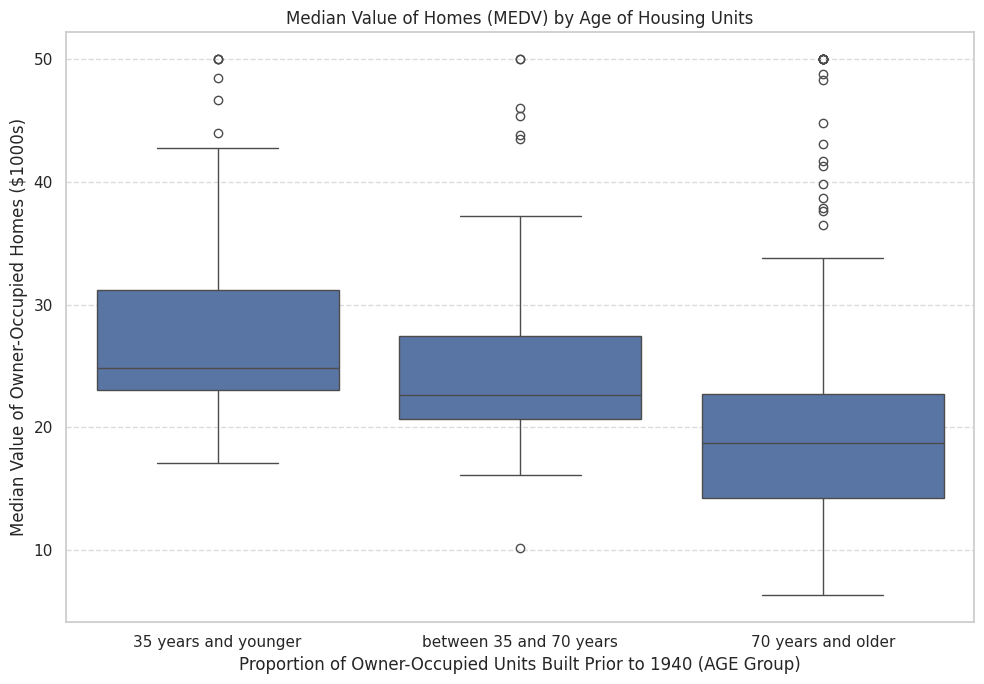

In [9]:
# Define the bins for age discretization
bins = [0, 35, 70, boston_df['AGE'].max()] # 0 to 35, 35 to 70, 70 to max_age
labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']

# Discretize the 'AGE' variable
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

# Generate the boxplot
pyplot.figure(figsize=(10, 7))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df, order=labels) # Ensure order for clarity
pyplot.title('Median Value of Homes (MEDV) by Age of Housing Units')
pyplot.xlabel('Proportion of Owner-Occupied Units Built Prior to 1940 (AGE Group)')
pyplot.ylabel('Median Value of Owner-Occupied Homes ($1000s)')
pyplot.grid(axis='y', linestyle='--', alpha=0.7)
pyplot.tight_layout()
pyplot.show()

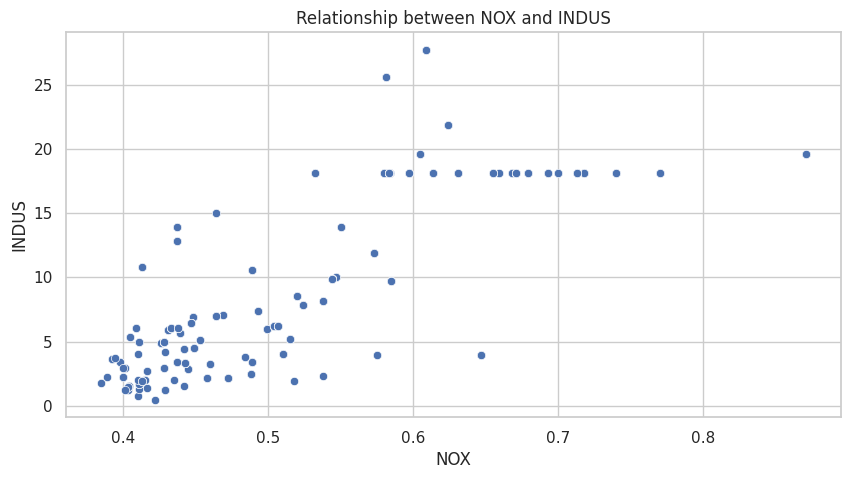

In [10]:
pyplot.figure(figsize=(10,5))
sns.scatterplot(x=boston_df.NOX, y=boston_df.INDUS, data=boston_df)
pyplot.title("Relationship between NOX and INDUS")
pyplot.show()

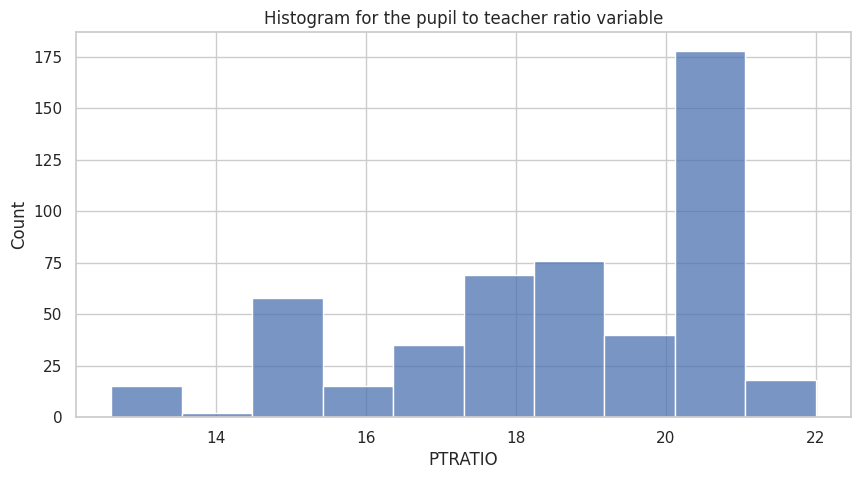

In [11]:
pyplot.figure(figsize=(10,5))
sns.histplot(data=boston_df, x='PTRATIO', bins=10, kde=False)
pyplot.title("Histogram for the pupil to teacher ratio variable")
pyplot.show()


For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.


HYPOTHESIS
H(0) = Both average MEDV are the same

H(1) = Both average MEDV are NOT the same


In [12]:
boston_df['CHAS'].value_counts()


CHAS
0.0    471
1.0     35
Name: count, dtype: int64

In [13]:
a = boston_df[boston_df['CHAS'] == 0]['MEDV']
a

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 471, dtype: float64

In [14]:
b = boston_df[boston_df['CHAS'] == 1]['MEDV']
b

142    13.4
152    15.3
154    17.0
155    15.6
160    27.0
162    50.0
163    50.0
208    24.4
209    20.0
210    21.7
211    19.3
212    22.4
216    23.3
218    21.5
219    23.0
220    26.7
221    21.7
222    27.5
234    29.0
236    25.1
269    20.7
273    35.2
274    32.4
276    33.2
277    33.1
282    46.0
283    50.0
356    17.8
357    21.7
358    22.7
363    16.8
364    21.9
369    50.0
370    50.0
372    50.0
Name: MEDV, dtype: float64

In [15]:
scipy.stats.ttest_ind(a,b,axis=0,equal_var=True)


TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

 p-value is less than the alpha value of 0.05, so we reject the null hypothesis.  Median value of owner-occupied homes are NOT the same

#2nd QUESTION

H(0) = all three population means are the same

H(1) = At least one of the means differ

In [16]:
boston_df["AGE"].value_counts()


AGE
100.0    43
95.4      4
96.0      4
98.2      4
97.9      4
         ..
58.4      1
74.4      1
73.4      1
33.1      1
89.3      1
Name: count, Length: 356, dtype: int64

In [18]:
low = boston_df[boston_df["AGE_Group"] == '35 years and younger']["MEDV"]
mid = boston_df[boston_df["AGE_Group"] == 'between 35 and 70 years']["MEDV"]
high = boston_df[boston_df["AGE_Group"] == '70 years and older']["MEDV"]

In [22]:
print("\nDistribution of custom AGE_Group:")
print(boston_df['AGE_Group'].value_counts().sort_index())


Distribution of custom AGE_Group:
AGE_Group
35 years and younger        91
between 35 and 70 years    128
70 years and older         244
Name: count, dtype: int64


In [23]:
print(f"\nNumber of observations in 'low' age group: {len(low)}")
print(f"Number of observations in 'mid' age group: {len(mid)}")
print(f"Number of observations in 'high' age group: {len(high)}")


Number of observations in 'low' age group: 91
Number of observations in 'mid' age group: 128
Number of observations in 'high' age group: 244


In [28]:
f_stats, p_value = stats.f_oneway(low, mid, high)

In [31]:
print("\n--- ANOVA Results ---")
print(f"F-Statistic = {f_stats:.4f}")
print(f"P-value = {p_value:.4f}")

if p_value < 0.05:
    print("\nInterpretation: The p-value is less than 0.05, so we reject the null hypothesis.")
    print("There is a statistically significant difference in median house values")
    print("across at least one of your defined AGE groups.")
else:
    print("\nInterpretation: The p-value is greater than or equal to 0.05, so we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in median house values")
    print("across your defined AGE groups.")


--- ANOVA Results ---
F-Statistic = 30.5668
P-value = 0.0000

Interpretation: The p-value is less than 0.05, so we reject the null hypothesis.
There is a statistically significant difference in median house values
across at least one of your defined AGE groups.


In [32]:
#print("F-Statistic={0}, P-value={1}".format(f_stats,p_value))

#3rd QUESTION

HYPOTHESIS
H(0) = There is no linear relationship between Nitric oxide (NOX) concentrations and non-retail acres per town (INDUS)

H(1) = There is a linear relationship between NOX and INDUS

In [38]:
nox = boston_df['NOX']
indus = boston_df['INDUS']
correlation_coefficient, p_value = pearsonr(nox, indus)

print(f"\n--- Pearson Correlation Results ---")
print(f"Pearson Correlation Coefficient (r): {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")



--- Pearson Correlation Results ---
Pearson Correlation Coefficient (r): 0.7637
P-value: 0.0000


In [39]:
alpha = 0.05 # Significance level

print(f"\nConclusion based on P-value (alpha = {alpha}):")
if p_value < alpha:
    print(f"Since the P-value ({p_value:.4f}) is less than alpha ({alpha}), we reject the null hypothesis.")
    print("There is a statistically significant linear relationship between Nitric oxide concentrations (NOX) and")
    print("the proportion of non-retail business acres per town (INDUS).")
    if correlation_coefficient > 0:
        print(f"The positive correlation (r={correlation_coefficient:.4f}) indicates that as the proportion of non-retail business acres increases,")
        print("Nitric oxide concentrations tend to increase as well.")
    else: # Though very unlikely given typical environmental relationships
        print(f"The negative correlation (r={correlation_coefficient:.4f}) indicates that as the proportion of non-retail business acres increases,")
        print("Nitric oxide concentrations tend to decrease.")
else:
    print(f"Since the P-value ({p_value:.4f}) is greater than or equal to alpha ({alpha}), we fail to reject the null hypothesis.")
    print("There is no statistically significant linear relationship between Nitric oxide concentrations (NOX) and")
    print("the proportion of non-retail business acres per town (INDUS).")


Conclusion based on P-value (alpha = 0.05):
Since the P-value (0.0000) is less than alpha (0.05), we reject the null hypothesis.
There is a statistically significant linear relationship between Nitric oxide concentrations (NOX) and
the proportion of non-retail business acres per town (INDUS).
The positive correlation (r=0.7637) indicates that as the proportion of non-retail business acres increases,
Nitric oxide concentrations tend to increase as well.


#QUESTION 4

In [40]:
# --- 2. Define Independent (X) and Dependent (Y) Variables ---
X = boston_df['DIS']    # Independent variable (predictor)
Y = boston_df['MEDV']   # Dependent variable (target)

In [41]:
X = sm.add_constant(X)

In [42]:
model = sm.OLS(Y, X).fit()

In [43]:
print("\n--- Regression Analysis Results (MEDV ~ DIS) ---")
print(model.summary())



--- Regression Analysis Results (MEDV ~ DIS) ---
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           1.21e-08
Time:                        22:39:55   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

In [44]:
# Coefficient for DIS
dis_coefficient = model.params['DIS']
dis_p_value = model.pvalues['DIS']
r_squared = model.rsquared

In [45]:
print(f"\nSummary of Impact:")
print(f"Coefficient for DIS: {dis_coefficient:.4f}")
print(f"P-value for DIS coefficient: {dis_p_value:.4f}")
print(f"R-squared: {r_squared:.4f}")

alpha = 0.05

print("\nDetailed Interpretation:")
if dis_p_value < alpha:
    print(f"The P-value for DIS ({dis_p_value:.4f}) is less than the significance level ({alpha}),")
    print("indicating that the weighted distance to employment centers (DIS) has a statistically significant linear impact on the median value of owner-occupied homes (MEDV).")
    if dis_coefficient > 0:
        print(f"For every additional unit of weighted distance to employment centers, the median home value is estimated to *increase* by ${dis_coefficient*1000:.2f}.")
        print("This suggests that homes further away from employment centers might, on average, be more valuable, which is counter-intuitive for typical urban economics.")
        print("This often happens when 'distance' is a proxy for other factors like quieter suburban living, larger lots, or lower pollution that are also associated with higher prices, or if it's a simple regression missing other crucial variables.")
    else: # dis_coefficient will likely be negative for this dataset based on common understanding
        print(f"For every additional unit of weighted distance to employment centers, the median home value is estimated to *decrease* by ${abs(dis_coefficient*1000):.2f}.")
        print("This indicates that homes closer to employment centers tend to have higher median values.")
else:
    print(f"The P-value for DIS ({dis_p_value:.4f}) is greater than or equal to the significance level ({alpha}),")
    print("indicating that the weighted distance to employment centers (DIS) does not have a statistically significant linear impact on the median value of owner-occupied homes (MEDV) in this simple linear model.")

print(f"\nThe R-squared value of {r_squared:.4f} means that approximately {r_squared*100:.2f}% of the variance in MEDV can be explained by the weighted distance to employment centers (DIS) alone.")
print("This R-squared value indicates how well the model explains the variability in home values.")



Summary of Impact:
Coefficient for DIS: 1.0916
P-value for DIS coefficient: 0.0000
R-squared: 0.0625

Detailed Interpretation:
The P-value for DIS (0.0000) is less than the significance level (0.05),
indicating that the weighted distance to employment centers (DIS) has a statistically significant linear impact on the median value of owner-occupied homes (MEDV).
For every additional unit of weighted distance to employment centers, the median home value is estimated to *increase* by $1091.61.
This suggests that homes further away from employment centers might, on average, be more valuable, which is counter-intuitive for typical urban economics.
This often happens when 'distance' is a proxy for other factors like quieter suburban living, larger lots, or lower pollution that are also associated with higher prices, or if it's a simple regression missing other crucial variables.

The R-squared value of 0.0625 means that approximately 6.25% of the variance in MEDV can be explained by the wei